In [7]:
# %pip install pandas numpy matplotlib openpyxl

# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Show plots inline
%matplotlib inline


In [8]:
# 📌 Step 2: Load data
file_path = "Enrollment details.xlsx"   # <- keep file in same folder as notebook
df = pd.read_excel(file_path, sheet_name="data")

df.head()


,No.,Enrollment Date,Days Since Enrollment,Batch Name,Paid Amount,Program Name,Trainee Name,Mobile Number,Email,Profile Completion (%),Preffered CIP StartDate,Preferred CIP EndDate,College Name
0,1,03 Sep 2025,0,Spring rest batch,"₹4,366.00",NaN,NaN,6361448123,shashirekha@mailinator.com,45 %,03 Sep 2025,-,-
1,2,02 Sep 2025,1 day,Spring rest batch,"₹4,366.00",NaN,NaN,7899948828,pratima@mailinator.com,45 %,03 Sep 2025,-,-
2,3,02 Sep 2025,1 day,Test80ELIP,"₹4,366.00",NaN,NaN,8088878100,chandana@mailinator.com,100 %,19 Apr 2025,-,-
3,4,02 Sep 2025,1 day,batch_3,₹592.00,NaN,NaN,9090909090,banushreem@gmail.com,45 %,03 Sep 2025,-,-
4,5,02 Sep 2025,1 day,Spring,"₹2,00,000.00",NaN,NaN,8765456789,bobjonas@gmail.com,45 %,03 Sep 2025,-,-


In [9]:
# 📌 Step 3: Data Cleaning Functions
def clean_paid(x):
    if pd.isna(x): return np.nan
    s = str(x).replace(',', '').replace('₹','').replace('Rs.','').replace('INR','').strip()
    if s in ['', '-']: return np.nan
    try: return float(s)
    except: return np.nan

def clean_pct(x):
    if pd.isna(x): return np.nan
    s = str(x).replace('%','').strip()
    if s in ['', '-']: return np.nan
    try: return float(s)
    except: return np.nan

def extract_days(x):
    if pd.isna(x): return np.nan
    import re
    m = re.findall(r'\d+', str(x))
    return float(m[0]) if m else np.nan

# Apply cleaning
df['Paid Amount Clean'] = df['Paid Amount'].apply(clean_paid)
df['Profile Completion Clean'] = df['Profile Completion (%)'].apply(clean_pct)
df['Days Since Enrollment Clean'] = df['Days Since Enrollment'].apply(extract_days)
df['Enrollment Date Parsed'] = pd.to_datetime(df['Enrollment Date'], errors='coerce', dayfirst=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   No.                          368 non-null    int64         
 1   Enrollment Date              368 non-null    object        
 2   Days Since Enrollment        368 non-null    object        
 3   Batch Name                   368 non-null    object        
 4   Paid Amount                  368 non-null    object        
 5   Program Name                 0 non-null      float64       
 6   Trainee Name                 0 non-null      float64       
 7   Mobile Number                368 non-null    int64         
 8   Email                        368 non-null    object        
 9   Profile Completion (%)       368 non-null    object        
 10  Preffered CIP StartDate      368 non-null    object        
 11  Preferred CIP EndDate        368 non-null    

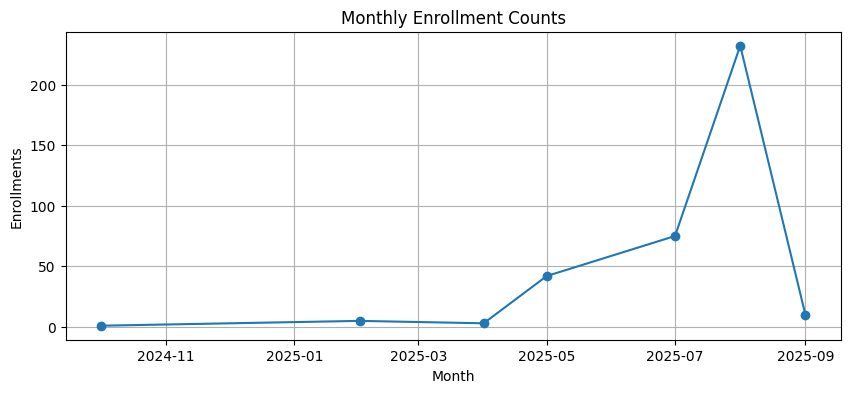

In [10]:
# 📌 Step 4: Enrollment Trend Over Time
enroll = df.dropna(subset=['Enrollment Date Parsed']).copy()
enroll['YearMonth'] = enroll['Enrollment Date Parsed'].dt.to_period('M').dt.to_timestamp()

monthly_counts = enroll.groupby('YearMonth').size()

plt.figure(figsize=(10,4))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title("Monthly Enrollment Counts")
plt.xlabel("Month")
plt.ylabel("Enrollments")
plt.grid(True)
plt.show()


In [11]:
# 📌 Step 5: Batch-wise Enrollments and Payments
batch_stats = df.groupby('Batch Name').agg(
    Enrollments=('No.', 'count'),
    Total_Paid=('Paid Amount Clean','sum'),
    Avg_Paid=('Paid Amount Clean','mean')
).sort_values('Enrollments', ascending=False)

batch_stats.head(10)


,Enrollments,Total_Paid,Avg_Paid
Batch Name,,,
Software Testing,125,324500.0,2596.000000
IJTP1 batch,23,4600000.0,200000.000000
Regular Courses_Testing,21,673110.0,32052.857143
Software testing_Manual,20,51920.0,2596.000000
ST_Manual,19,49324.0,2596.000000
Mern stack,14,13381.2,955.800000
Experiential Batchh,12,434530.0,36210.833333
New batch(ELIP),10,320950.0,32095.000000
CIP_Batch_01,8,19480.0,2435.000000


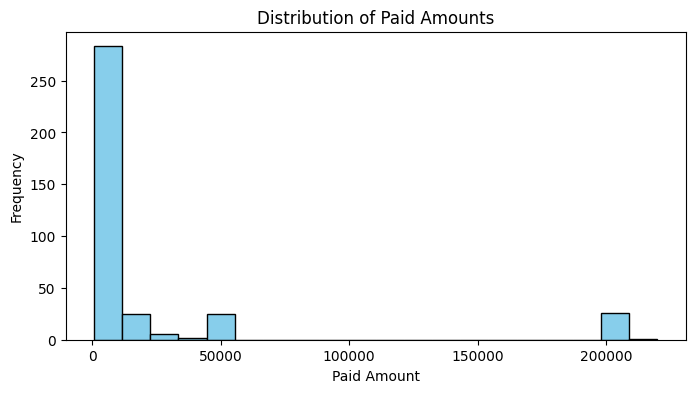

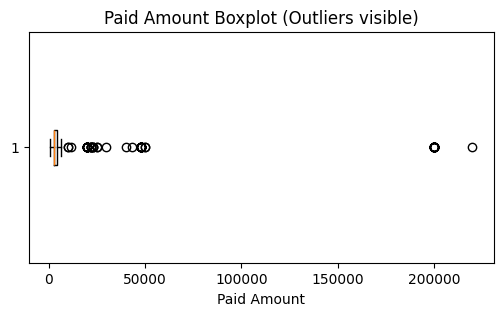

In [12]:
# 📌 Step 6: Paid Amount Distribution
plt.figure(figsize=(8,4))
plt.hist(df['Paid Amount Clean'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Paid Amounts")
plt.xlabel("Paid Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,3))
plt.boxplot(df['Paid Amount Clean'].dropna(), vert=False)
plt.title("Paid Amount Boxplot (Outliers visible)")
plt.xlabel("Paid Amount")
plt.show()


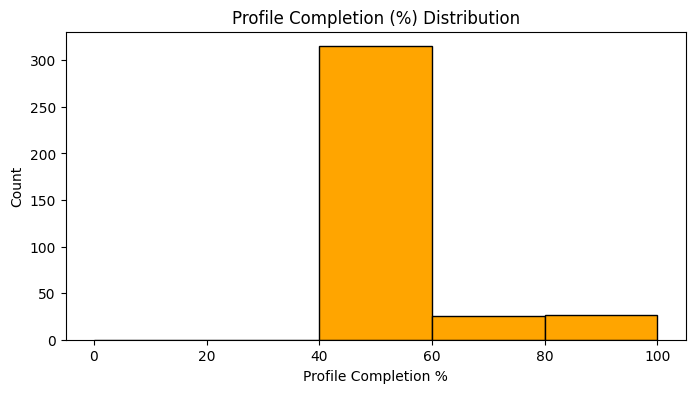

count    368.000000
mean      50.095109
std       13.523788
min       45.000000
25%       45.000000
50%       45.000000
75%       45.000000
max      100.000000
Name: Profile Completion Clean, dtype: float64

In [13]:
# 📌 Step 7: Profile Completion Analysis
plt.figure(figsize=(8,4))
plt.hist(df['Profile Completion Clean'].dropna(), bins=[0,20,40,60,80,100], color='orange', edgecolor='black')
plt.title("Profile Completion (%) Distribution")
plt.xlabel("Profile Completion %")
plt.ylabel("Count")
plt.show()

df['Profile Completion Clean'].describe()


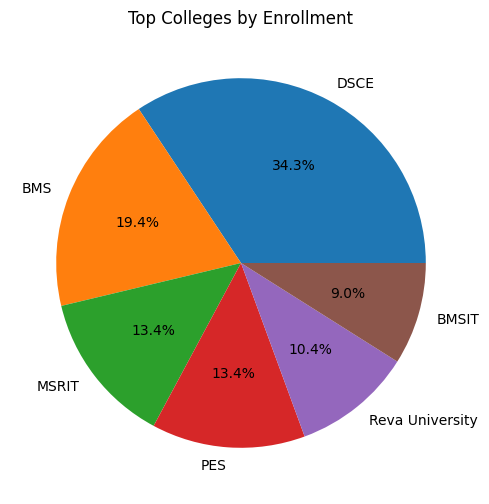

In [14]:
# 📌 Step 8: College-wise Enrollment
top_colleges = df['College Name'].replace(['-',''], np.nan).dropna().value_counts().head(6)

plt.figure(figsize=(6,6))
plt.pie(top_colleges.values, labels=top_colleges.index, autopct='%1.1f%%')
plt.title("Top Colleges by Enrollment")
plt.show()


In [15]:
# 📌 Step 9: Correlation Analysis
corr = df[['Paid Amount Clean','Profile Completion Clean','Days Since Enrollment Clean']].corr()
corr


,Paid Amount Clean,Profile Completion Clean,Days Since Enrollment Clean
Paid Amount Clean,1.000000,-0.021233,0.376032
Profile Completion Clean,-0.021233,1.000000,-0.023350
Days Since Enrollment Clean,0.376032,-0.023350,1.000000


In [16]:
# 📌 Step 10: Key Insights / Conclusions
print("Total Enrollments:", df.shape[0])
print("Total Revenue Collected:", df['Paid Amount Clean'].sum())
print("Median Paid Amount:", df['Paid Amount Clean'].median())
print("Average Profile Completion %:", df['Profile Completion Clean'].mean())

print("\nTop Batch by Enrollments:", batch_stats.index[0])
print("Top College by Enrollments:", top_colleges.index[0])


Total Enrollments: 368
Total Revenue Collected: 8039508.6
Median Paid Amount: 2596.0
Average Profile Completion %: 50.09510869565217

Top Batch by Enrollments: Software Testing
Top College by Enrollments: DSCE
